In [17]:
# orchestration/graph.py
from langgraph.graph import StateGraph, END
from orchestration.state import ResearchState

from agents.supervisor import supervisor_agent
from agents.researcher import research_agent
from agents.memory_agent import memory_agent
from agents.analyst import analyst_agent
from agents.context_builder import context_builder_agent
from agents.summarizer import summarizer_agent


def build_graph():
    graph = StateGraph(ResearchState)

    # nodes (UNCHANGED)
    graph.add_node("supervisor", supervisor_agent)
    graph.add_node("research", research_agent)
    graph.add_node("memory", memory_agent)
    graph.add_node("analysis", analyst_agent)
    graph.add_node("context", context_builder_agent)
    graph.add_node("summarize", summarizer_agent)

    # entry
    graph.set_entry_point("supervisor")

    # supervisor is the ONLY router
    graph.add_conditional_edges(
        "supervisor",
        lambda state: state["next_step"],
        {
            "research": "research",
            "context": "context",
            "summarize": "summarize",
            "end": END,
        }
    )

    # execution chain
    graph.add_edge("research", "memory")
    graph.add_edge("memory", "analysis")

    # analysis NEVER routes — it reports
    graph.add_edge("analysis", "supervisor")

    # context always flows back to supervisor
    graph.add_edge("context", "supervisor")

    # summarizer ends
    graph.add_edge("summarize", END)

    return graph.compile()
RESEARCH_ANALYST_GRAPH = build_graph()

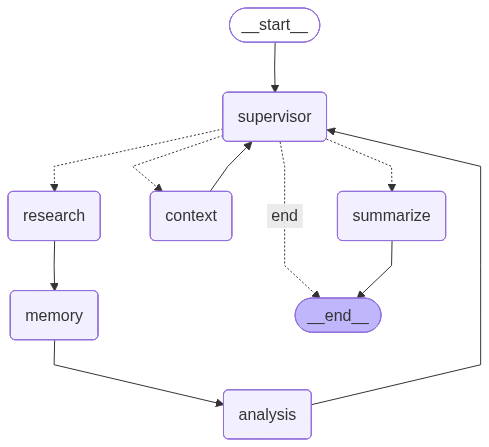

In [18]:
RESEARCH_ANALYST_GRAPH